실습 4: 정보 이론 응용 실험

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.special import kl_div
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 시드 설정
np.random.seed(42)

4.1 엔트로피와 정보량 실험

=== Information Theory Experiments ===

1. Coin Flip Entropy
  Maximum entropy at p = 0.500
  Maximum entropy value = 1.000 bits

2. Dice Entropy
  Fair Die: 2.585 bits
  Biased Die: 2.161 bits
  Two-sided Die: 1.000 bits
  Deterministic: -0.000 bits

3. Information Content vs Probability

4. Conditional Entropy
  H(Umbrella) = 0.958 bits
  H(Umbrella|Weather) = 0.570 bits
  I(Weather; Umbrella) = 0.388 bits

5. Data Compression Simulation
  Text: AAAAAAAAAA
    Entropy: -0.000 bits/char
    Fixed encoding: 0 bits
    Optimal encoding: -0.0 bits
    Compression ratio: nanx
  Text: ABABABABAB
    Entropy: 1.000 bits/char
    Fixed encoding: 10 bits
    Optimal encoding: 10.0 bits
    Compression ratio: 1.00x
  Text: ABCDEFGHIJ
    Entropy: 3.322 bits/char
    Fixed encoding: 40 bits
    Optimal encoding: 33.2 bits
    Compression ratio: 1.20x
  Text: AABBAABBAA
    Entropy: 0.971 bits/char
    Fixed encoding: 10 bits
    Optimal encoding: 9.7 bits
    Compression ratio: 1.03x

6. Cross 

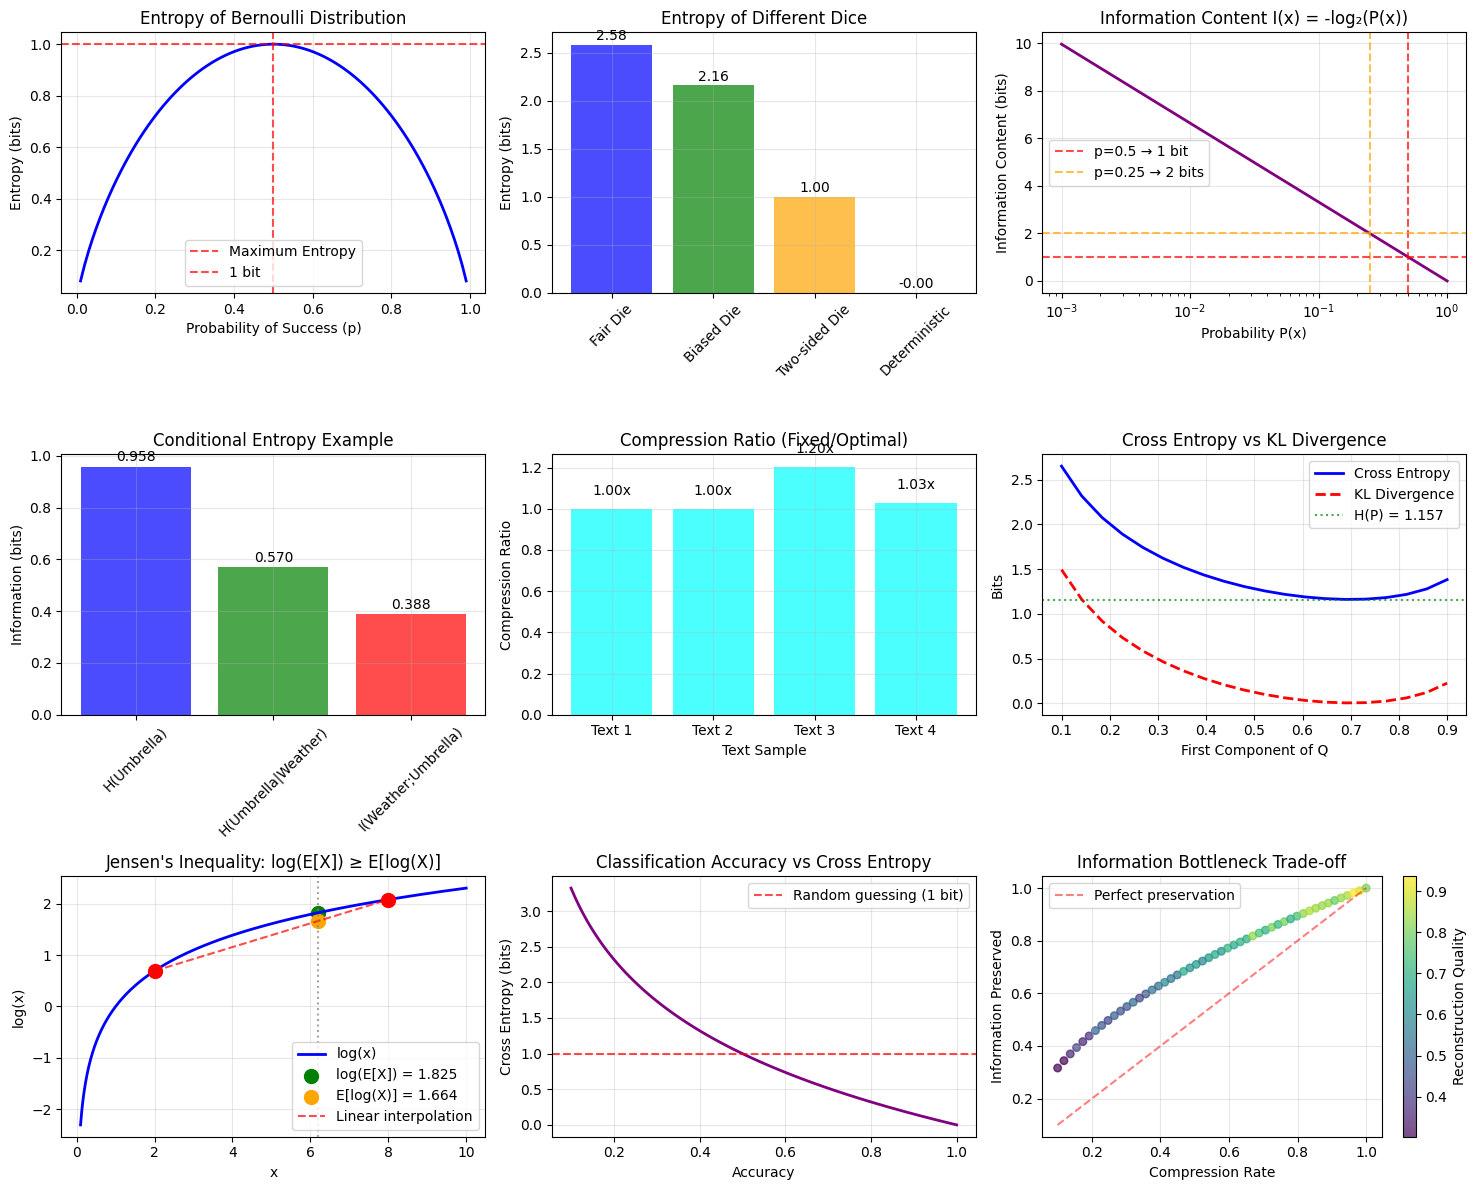

In [2]:
def information_theory_experiments():
    """정보 이론의 핵심 개념들을 실험으로 확인"""
    
    def entropy(p):
        """엔트로피 계산 (밑 2)"""
        p = np.array(p)
        p = p[p > 0]  # 0 확률 제거
        return -np.sum(p * np.log2(p))
    
    def information_content(p):
        """정보량 계산"""
        return -np.log2(p)
    
    print("=== Information Theory Experiments ===\n")
    
    # 실험 1: 동전 던지기의 엔트로피
    print("1. Coin Flip Entropy")
    p_values = np.linspace(0.01, 0.99, 99)
    entropies = []
    
    for p in p_values:
        coin_dist = [1-p, p]
        h = entropy(coin_dist)
        entropies.append(h)
    
    plt.figure(figsize=(15, 12))
    
    # 엔트로피 곡선
    plt.subplot(3, 3, 1)
    plt.plot(p_values, entropies, 'b-', linewidth=2)
    plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='Maximum Entropy')
    plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='1 bit')
    plt.title('Entropy of Bernoulli Distribution')
    plt.xlabel('Probability of Success (p)')
    plt.ylabel('Entropy (bits)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    max_entropy_p = p_values[np.argmax(entropies)]
    print(f"  Maximum entropy at p = {max_entropy_p:.3f}")
    print(f"  Maximum entropy value = {max(entropies):.3f} bits")
    
    # 실험 2: 주사위 엔트로피
    print("\n2. Dice Entropy")
    dice_scenarios = [
        {'name': 'Fair Die', 'probs': [1/6]*6},
        {'name': 'Biased Die', 'probs': [0.5, 0.1, 0.1, 0.1, 0.1, 0.1]},
        {'name': 'Two-sided Die', 'probs': [0.5, 0.5, 0, 0, 0, 0]},
        {'name': 'Deterministic', 'probs': [1, 0, 0, 0, 0, 0]}
    ]
    
    plt.subplot(3, 3, 2)
    dice_entropies = []
    dice_names = []
    
    for scenario in dice_scenarios:
        h = entropy(scenario['probs'])
        dice_entropies.append(h)
        dice_names.append(scenario['name'])
        print(f"  {scenario['name']}: {h:.3f} bits")
    
    bars = plt.bar(dice_names, dice_entropies, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
    plt.title('Entropy of Different Dice')
    plt.ylabel('Entropy (bits)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 값 표시
    for bar, entropy_val in zip(bars, dice_entropies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{entropy_val:.2f}', ha='center', va='bottom')
    
    # 실험 3: 정보량 vs 확률
    print("\n3. Information Content vs Probability")
    probs = np.logspace(-3, 0, 1000)  # 0.001 to 1
    info_contents = information_content(probs)
    
    plt.subplot(3, 3, 3)
    plt.plot(probs, info_contents, 'purple', linewidth=2)
    plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='p=0.5 → 1 bit')
    plt.axvline(x=0.25, color='orange', linestyle='--', alpha=0.7, label='p=0.25 → 2 bits')
    plt.axhline(y=1, color='red', linestyle='--', alpha=0.7)
    plt.axhline(y=2, color='orange', linestyle='--', alpha=0.7)
    plt.title('Information Content I(x) = -log₂(P(x))')
    plt.xlabel('Probability P(x)')
    plt.ylabel('Information Content (bits)')
    plt.xscale('log')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 실험 4: 조건부 엔트로피
    print("\n4. Conditional Entropy")
    
    # 날씨와 우산 예제
    # P(Weather): [Sunny=0.6, Rainy=0.4]
    # P(Umbrella|Sunny): [No=0.9, Yes=0.1]
    # P(Umbrella|Rainy): [No=0.2, Yes=0.8]
    
    p_weather = [0.6, 0.4]  # [Sunny, Rainy]
    p_umbrella_given_sunny = [0.9, 0.1]  # [No, Yes]
    p_umbrella_given_rainy = [0.2, 0.8]  # [No, Yes]
    
    # H(Umbrella)
    p_umbrella = [
        p_weather[0] * p_umbrella_given_sunny[0] + p_weather[1] * p_umbrella_given_rainy[0],
        p_weather[0] * p_umbrella_given_sunny[1] + p_weather[1] * p_umbrella_given_rainy[1]
    ]
    h_umbrella = entropy(p_umbrella)
    
    # H(Umbrella|Weather)
    h_umbrella_given_weather = (
        p_weather[0] * entropy(p_umbrella_given_sunny) +
        p_weather[1] * entropy(p_umbrella_given_rainy)
    )
    
    # 상호정보량 I(Weather; Umbrella) = H(Umbrella) - H(Umbrella|Weather)
    mutual_info = h_umbrella - h_umbrella_given_weather
    
    plt.subplot(3, 3, 4)
    info_values = [h_umbrella, h_umbrella_given_weather, mutual_info]
    info_labels = ['H(Umbrella)', 'H(Umbrella|Weather)', 'I(Weather;Umbrella)']
    colors = ['blue', 'green', 'red']
    
    bars = plt.bar(info_labels, info_values, color=colors, alpha=0.7)
    plt.title('Conditional Entropy Example')
    plt.ylabel('Information (bits)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    for bar, value in zip(bars, info_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')
    
    print(f"  H(Umbrella) = {h_umbrella:.3f} bits")
    print(f"  H(Umbrella|Weather) = {h_umbrella_given_weather:.3f} bits")
    print(f"  I(Weather; Umbrella) = {mutual_info:.3f} bits")
    
    # 실험 5: 데이터 압축 시뮬레이션
    print("\n5. Data Compression Simulation")
    
    # 텍스트 압축 예제
    text_samples = [
        "AAAAAAAAAA",  # 높은 압축률
        "ABABABABAB",  # 중간 압축률
        "ABCDEFGHIJ",  # 낮은 압축률
        "AABBAABBAA"   # 패턴 있음
    ]
    
    compression_results = []
    
    plt.subplot(3, 3, 5)
    
    for i, text in enumerate(text_samples):
        # 문자 빈도 계산
        chars = list(set(text))
        char_counts = {char: text.count(char) for char in chars}
        total_chars = len(text)
        char_probs = {char: count/total_chars for char, count in char_counts.items()}
        
        # 엔트로피 계산 (이론적 압축 한계)
        text_entropy = entropy(list(char_probs.values()))
        
        # 고정 길이 인코딩 (naive)
        bits_per_char_fixed = int(np.ceil(np.log2(len(chars))))
        total_bits_fixed = total_chars * bits_per_char_fixed
        
        # 최적 인코딩 (엔트로피 기반)
        total_bits_optimal = total_chars * text_entropy
        
        compression_results.append({
            'text': text[:10] + '...' if len(text) > 10 else text,
            'entropy': text_entropy,
            'fixed_bits': total_bits_fixed,
            'optimal_bits': total_bits_optimal,
            'compression_ratio': total_bits_fixed / total_bits_optimal if total_bits_optimal > 0 else 1
        })
        
        print(f"  Text: {text}")
        print(f"    Entropy: {text_entropy:.3f} bits/char")
        print(f"    Fixed encoding: {total_bits_fixed} bits")
        print(f"    Optimal encoding: {total_bits_optimal:.1f} bits")
        print(f"    Compression ratio: {total_bits_fixed/total_bits_optimal:.2f}x")
    
    # 압축 비율 시각화
    texts = [r['text'] for r in compression_results]
    ratios = [r['compression_ratio'] for r in compression_results]
    
    bars = plt.bar(range(len(texts)), ratios, color='cyan', alpha=0.7)
    plt.title('Compression Ratio (Fixed/Optimal)')
    plt.xlabel('Text Sample')
    plt.ylabel('Compression Ratio')
    plt.xticks(range(len(texts)), [f'Text {i+1}' for i in range(len(texts))])
    plt.grid(True, alpha=0.3)
    
    for bar, ratio in zip(bars, ratios):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                f'{ratio:.2f}x', ha='center', va='bottom')
    
    # 실험 6: 크로스 엔트로피 vs KL Divergence
    print("\n6. Cross Entropy vs KL Divergence")
    
    plt.subplot(3, 3, 6)
    
    # 참 분포 (고정)
    p_true = np.array([0.7, 0.2, 0.1])
    
    # 예측 분포들 (변화)
    q_range = np.linspace(0.1, 0.9, 20)
    cross_entropies = []
    kl_divergences = []
    
    for q1 in q_range:
        q2 = (1 - q1) * 0.6  # 두 번째 확률
        q3 = 1 - q1 - q2     # 세 번째 확률 (정규화)
        
        if q3 > 0:  # 유효한 확률분포인 경우
            q_pred = np.array([q1, q2, q3])
            
            # 크로스 엔트로피
            ce = -np.sum(p_true * np.log2(q_pred + 1e-10))
            cross_entropies.append(ce)
            
            # KL Divergence
            kl = np.sum(p_true * np.log2(p_true / (q_pred + 1e-10)))
            kl_divergences.append(kl)
        else:
            cross_entropies.append(np.nan)
            kl_divergences.append(np.nan)
    
    valid_indices = ~np.isnan(cross_entropies)
    valid_q_range = q_range[valid_indices]
    valid_ce = np.array(cross_entropies)[valid_indices]
    valid_kl = np.array(kl_divergences)[valid_indices]
    
    plt.plot(valid_q_range, valid_ce, 'b-', linewidth=2, label='Cross Entropy')
    plt.plot(valid_q_range, valid_kl, 'r--', linewidth=2, label='KL Divergence')
    
    # 엔트로피 (이론적 최솟값)
    h_true = entropy(p_true)
    plt.axhline(y=h_true, color='green', linestyle=':', alpha=0.7, 
                label=f'H(P) = {h_true:.3f}')
    
    plt.title('Cross Entropy vs KL Divergence')
    plt.xlabel('First Component of Q')
    plt.ylabel('Bits')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    print(f"  True distribution entropy: {h_true:.3f} bits")
    print(f"  Minimum cross entropy: {np.min(valid_ce):.3f} bits")
    print(f"  Minimum KL divergence: {np.min(valid_kl):.3f} bits")
    
    # 실험 7: Jensen's Inequality 시각화
    print("\n7. Jensen's Inequality Demonstration")
    
    plt.subplot(3, 3, 7)
    
    # 로그 함수 (오목함수)
    x = np.linspace(0.1, 10, 1000)
    y = np.log(x)
    
    plt.plot(x, y, 'b-', linewidth=2, label='log(x)')
    
    # 두 점에서의 Jensen's Inequality
    x1, x2 = 2, 8
    y1, y2 = np.log(x1), np.log(x2)
    lambda_val = 0.3
    
    # 가중 평균점들
    x_avg = lambda_val * x1 + (1 - lambda_val) * x2
    y_avg_func = np.log(x_avg)  # log(E[X])
    y_avg_direct = lambda_val * y1 + (1 - lambda_val) * y2  # E[log(X)]
    
    # 점들 표시
    plt.scatter([x1, x2], [y1, y2], color='red', s=100, zorder=5)
    plt.scatter(x_avg, y_avg_func, color='green', s=100, label=f'log(E[X]) = {y_avg_func:.3f}')
    plt.scatter(x_avg, y_avg_direct, color='orange', s=100, label=f'E[log(X)] = {y_avg_direct:.3f}')
    
    # 선분 그리기
    plt.plot([x1, x2], [y1, y2], 'r--', alpha=0.7, label='Linear interpolation')
    plt.axvline(x=x_avg, color='gray', linestyle=':', alpha=0.7)
    
    plt.title('Jensen\'s Inequality: log(E[X]) ≥ E[log(X)]')
    plt.xlabel('x')
    plt.ylabel('log(x)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    print(f"  log(E[X]) = {y_avg_func:.3f}")
    print(f"  E[log(X)] = {y_avg_direct:.3f}")
    print(f"  Inequality satisfied: {y_avg_func >= y_avg_direct}")
    
    # 실험 8: 정보 이론과 머신러닝
    print("\n8. Information Theory in Machine Learning")
    
    plt.subplot(3, 3, 8)
    
    # 분류 성능과 크로스 엔트로피의 관계
    accuracies = np.linspace(0.1, 1.0, 100)
    cross_entropies_binary = []
    
    for acc in accuracies:
        # 이진 분류에서 정확도가 acc일 때의 크로스 엔트로피
        # 간단한 모델: 올바른 클래스에 확률 acc, 틀린 클래스에 1-acc
        ce = -0.5 * (np.log2(acc) + np.log2(acc))  # 두 클래스 평균
        cross_entropies_binary.append(ce)
    
    plt.plot(accuracies, cross_entropies_binary, 'purple', linewidth=2)
    plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Random guessing (1 bit)')
    plt.title('Classification Accuracy vs Cross Entropy')
    plt.xlabel('Accuracy')
    plt.ylabel('Cross Entropy (bits)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 실험 9: 정보 병목 시뮬레이션
    print("\n9. Information Bottleneck Simulation")
    
    plt.subplot(3, 3, 9)
    
    # 압축률 vs 정보 보존 트레이드오프
    compression_rates = np.linspace(0.1, 1.0, 50)
    information_preserved = []
    reconstruction_quality = []
    
    for rate in compression_rates:
        # 압축률이 높을수록 정보 보존 감소 (비선형)
        info_preserved = rate ** 0.5  # 제곱근 관계
        information_preserved.append(info_preserved)
        
        # 재구성 품질은 정보 보존에 의존하지만 노이즈 있음
        quality = info_preserved * 0.9 + np.random.normal(0, 0.05)
        quality = np.clip(quality, 0, 1)
        reconstruction_quality.append(quality)
    
    plt.scatter(compression_rates, information_preserved, 
               c=reconstruction_quality, cmap='viridis', alpha=0.7, s=30)
    plt.colorbar(label='Reconstruction Quality')
    plt.plot(compression_rates, compression_rates, 'r--', alpha=0.5, label='Perfect preservation')
    plt.title('Information Bottleneck Trade-off')
    plt.xlabel('Compression Rate')
    plt.ylabel('Information Preserved')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 실행
information_theory_experiments()